In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
# Reading the train, test

df_train = pd.read_csv('train.csv',encoding='utf-8')
df_test = pd.read_csv('test.csv',encoding='utf-8')

In [112]:
df_train

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1
...,...,...
5995,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
5996,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
5997,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
5998,बधाई र सुभकामना ।।,1


In [113]:
df_test

,text,label
0,असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...,1
1,"राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...",1
2,महानायक राजेश हमाल तपाई साँच्चै धन्यवादको पात्...,1
3,जातको प्रष्न बाट सबै जनालाई सकरात्मक सन्देश मि...,1
4,"बहसको सुरुवात भएको छ, अझै जोडदार रुपमा गर्नुपर...",1
...,...,...
1991,कस्ता कस्ता पागल memory king छन यार नेपालमा,0
1992,दोस्रो मूर्ख बिजय साही हो,0
1993,बिजय शाहीलाई किन निरुत्साहित गरेको त पुण्य गौत...,0
1994,यस्ता बिदेशी महादलालीहरु कहाँ गएर यो प्रश्नको ...,0


In [114]:
df_train['label'].value_counts()

1     2378
0     2377
2     1236
-        5
20       1
11       1
o        1
--       1
Name: label, dtype: int64

In [115]:
df_test['label'].value_counts()

1    888
0    610
2    496
o      1
-      1
Name: label, dtype: int64

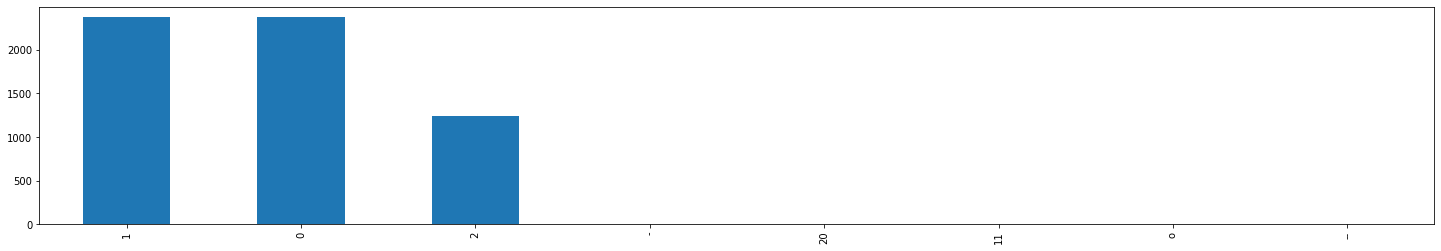

In [116]:
plt.figure(figsize=(25,4))
df_train['label'].value_counts().plot(kind='bar')
plt.axis()
plt.show()

In [117]:
df_train['label'].value_counts().shape

(8,)

In [3]:
df_train.drop(df_train[df_train['label'] == '-'].index, inplace = True)
df_train.drop(df_train[df_train['label'] == '20'].index, inplace = True)
df_train.drop(df_train[df_train['label'] == '11'].index, inplace = True)
df_train.drop(df_train[df_train['label'] == 'o'].index, inplace = True)
df_train.drop(df_train[df_train['label'] == '--'].index, inplace = True)

In [4]:
df_test.drop(df_test[df_test['label'] == '-'].index, inplace = True)
df_test.drop(df_test[df_test['label'] == 'o'].index, inplace = True)

In [120]:
df_test['label'].value_counts()

1    888
0    610
2    496
Name: label, dtype: int64

In [121]:
df_train['label'].value_counts()

1    2378
0    2377
2    1236
Name: label, dtype: int64

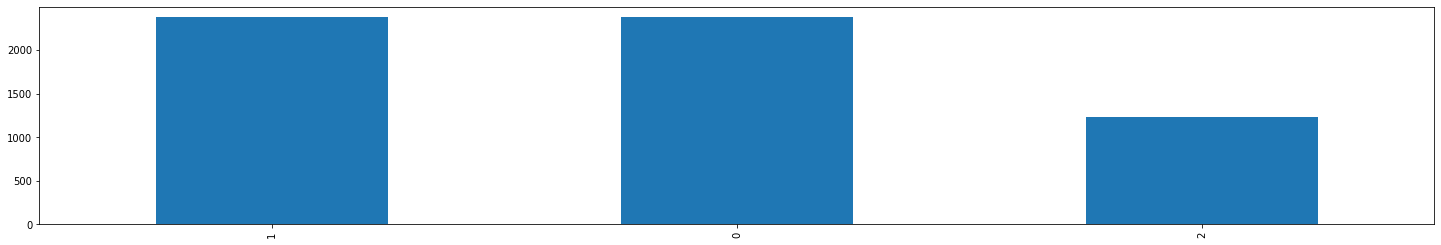

In [122]:
plt.figure(figsize=(25,4))
df_train['label'].value_counts().plot(kind='bar')
plt.axis()
plt.show()

In [123]:
df_train

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1
...,...,...
5995,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
5996,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
5997,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
5998,बधाई र सुभकामना ।।,1


In [25]:
X_train, y_train = df_train['text'],df_train['label']
X_test, y_test = df_test['text'],df_test['label']

In [125]:
y_train

0       2
1       1
2       2
3       2
4       1
       ..
5995    1
5996    2
5997    2
5998    1
5999    1
Name: label, Length: 5991, dtype: object

In [126]:
X_test

0       असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...
1       राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...
2       महानायक राजेश हमाल तपाई साँच्चै धन्यवादको पात्...
3       जातको प्रष्न बाट सबै जनालाई सकरात्मक सन्देश मि...
4       बहसको सुरुवात भएको छ, अझै जोडदार रुपमा गर्नुपर...
                              ...                        
1991          कस्ता कस्ता पागल memory king छन यार नेपालमा
1992                            दोस्रो मूर्ख बिजय साही हो
1993    बिजय शाहीलाई किन निरुत्साहित गरेको त पुण्य गौत...
1994    यस्ता बिदेशी महादलालीहरु कहाँ गएर यो प्रश्नको ...
1995     बुढा खालहरूमा बाँकि रहेको नेताहरुमा बाबुराम ज...
Name: text, Length: 1994, dtype: object

In [127]:
X_train

0       बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...
1       1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...
2       होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...
3       खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...
4                                            राम्रो भयो️️
                              ...                        
5995    समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...
5996    Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...
5997    यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...
5998                                   बधाई र सुभकामना ।।
5999        कार्यक्रम एकदमै सकारात्मक छ। निरन्तरता पाओस्।
Name: text, Length: 5991, dtype: object

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [129]:
!ls /root/nltk_data/corpora/stopwords

arabic	     dutch    german	  italian    portuguese  slovene  turkish
azerbaijani  english  greek	  kazakh     README	 spanish
bengali      finnish  hungarian   nepali     romanian	 swedish
danish	     french   indonesian  norwegian  russian	 tajik


In [26]:
X_train=X_train.values.astype('U')
X_test=X_test.values.astype('U')

In [131]:
X_train

array(['बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्काल प्रोफिट बूकिङ आउने सम्भावना रहेन ! भोलि अर्को ट्रेन्ड समात्न सक्ने अबस्था पनि दरो छ',
       '1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो कुरो होइन अझै पनि किन्ने अवसर छ है।',
       'होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महिना भयो (book close ) अहिले सम्म खातामा आउदैन त , ब्याज संग दिने योजना रहेछ कि क्या हो',
       ...,
       'यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना कुनामा पुग्नु पर्छ यो आवाज र परिबर्तन आफै बाट गर्नुश ।समाज गाउँ देश आफै बद्लिन्छ। मानिस एउटाै हो के छ र यो जातमा',
       'बधाई र सुभकामना ।।',
       'कार्यक्रम एकदमै सकारात्मक छ। निरन्तरता पाओस्।'], dtype='<U987')

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#stopwords_list = stopwords.words('english') + stopwords.words('nepali')

stopWords = set(nltk.corpus.stopwords.words('/content/nepali'))

cv_doc = CountVectorizer(max_features=20000,stop_words=stopWords ,ngram_range=(1,1), min_df=3,encoding='utf-8')
cv_vector = cv_doc.fit(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['अक', 'अग', 'अझ', 'अन', 'अर', 'आजक', 'आत', 'आद', 'आफ', 'आय', 'ईक', 'उद', 'उनक', 'उनल', 'उह', 'एउट', 'एन', 'कत', 'कस', 'कसर', 'कह', 'गत', 'गय', 'गर', 'चम', 'छन', 'जत', 'जबक', 'जस', 'जसक', 'जसब', 'जसम', 'जसल', 'जह', 'तत', 'तथ', 'तदन', 'तप', 'तवम', 'नज', 'नत', 'नभन', 'नय', 'पक', 'पछ', 'पन', 'पय', 'पर', 'पष', 'पह', 'बन', 'बर', 'भएक', 'भय', 'भव', 'मल', 'यत', 'यथ', 'यद', 'यप', 'यसक', 'यसपछ', 'यसब', 'यसर', 'यह', 'रण', 'रत', 'रमश', 'रह', 'लस', 'वर', 'सक', 'सट', 'सध', 'सपछ', 'सब', 'सम', 'सर', 'सह', 'हन', 'हर', 'हरण'] not in stop_words.
  % sorted(inconsistent)


In [10]:
! wget https://raw.githubusercontent.com/sndsabin/Nepali-News-Classifier/master/nepali

--2022-02-18 14:37:48--  https://raw.githubusercontent.com/sndsabin/Nepali-News-Classifier/master/nepali
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3613 (3.5K) [text/plain]
Saving to: ‘nepali’

nepali              100%[===================>]   3.53K  --.-KB/s    in 0s      

2022-02-18 14:37:48 (37.1 MB/s) - ‘nepali’ saved [3613/3613]



In [14]:
from nltk.corpus import stopwords
#from nltk import TweetTokenizer
#tokenizer = TweetTokenizer()

In [27]:
stopWords = nltk.corpus.stopwords.words('/content/nepali') + stopwords.words('english')

tfidfVectorizer = TfidfVectorizer(max_features=30000,
                                  tokenizer= lambda x: x.split(" "),
                                  sublinear_tf=True, encoding='utf-8',
                                  decode_error='ignore',
                                  ngram_range=(1, 1), 
                                  stop_words=stopWords)

vectorised = tfidfVectorizer.fit(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [28]:
X_train = vectorised.transform(X_train)
X_test= vectorised.transform(X_test)

In [136]:
from gensim.models import Word2Vec, KeyedVectors
#model = Word2Vec(X_train, size=1000, min_count=5, window=10, sg=0, workers=10)
#print("Vocabulary dimension", model.vector_size)
#print("Number of words in vocab", len(model.wv.vocab))

In [137]:
#model.wv.most_similar('न', topn=10)

In [138]:
#X_train = cv_vector.transform(X_train)
#X_test= cv_vector.transform(X_test)

In [229]:
X_train

<5991x4069 sparse matrix of type '<class 'numpy.float64'>'
	with 6066 stored elements in Compressed Sparse Row format>

In [29]:
label_encoder = LabelEncoder().fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [30]:
from sklearn.svm import LinearSVC
clf=LinearSVC(loss='hinge',random_state=0,max_iter=10000,penalty='l2')
clf.fit(X_train, y_train)    # training model on train data

clfval = clf.predict(X_test)   # predicting test data
print('F1 Score : {}'.format(f1_score(y_test, clfval, average='micro')))  # printing F1 score 


F1 Score : 0.5877632898696088


In [31]:
from sklearn.svm import SVC
clf=SVC(kernel='linear',random_state=0,max_iter=10000)
clf.fit(X_train, y_train)    # training model on train data

clfval = clf.predict(X_test)   # predicting test data
print('F1 Score : {}'.format(f1_score(y_test, clfval, average='micro')))  # printing F1 score 


F1 Score : 0.5832497492477432


In [32]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB(alpha=1.5,fit_prior=False)
nb.fit(X_train,y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % f1_score(y_test, y_pred,average='micro'))

accuracy 0.5882647943831495


In [239]:
from sklearn.linear_model import LogisticRegression
lrr=LogisticRegression(solver='saga', n_jobs=1, C=1e5)
lrr.fit(X_train, y_train)
lrrval = lrr.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, lrrval, average='micro')))

F1 Score : 0.5722166499498496


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [240]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha=0.9,fit_prior=False)
clf.fit(X_train, y_train)
clfval = clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, clfval, average='micro')))

F1 Score : 0.5651955867602808


In [243]:
from sklearn.naive_bayes import ComplementNB
cllf = ComplementNB(alpha=1.0, fit_prior=False,norm=True)
cllf.fit(X_train, y_train)
cllfval = clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, cllfval, average='micro')))

F1 Score : 0.5651955867602808


In [244]:
from sklearn.linear_model import PassiveAggressiveClassifier
cclf = PassiveAggressiveClassifier(max_iter=2500, random_state=43,tol=1e-5)
cclf.fit(X_train, y_train)

cllfval = cclf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, cllfval, average='micro')))

F1 Score : 0.5521564694082247


In [245]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.2,max_depth=1, random_state=0).fit(X_train, y_train)

gbpred=clf.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, gbpred, average='micro')))

F1 Score : 0.5120361083249749


In [41]:

from sklearn.linear_model import Perceptron

percept = Perceptron(alpha=0.00001, tol=1e-6, penalty='l1', random_state=1, max_iter=3000)
percept = percept.fit(X_train, y_train)

cpfval = percept.predict(X_test)
print('F1 Score : {}'.format(f1_score(y_test, cpfval, average='micro')))

F1 Score : 0.5391173520561685


              precision    recall  f1-score   support

           0       0.48      0.75      0.59       610
           1       0.72      0.73      0.72       888
           2       0.47      0.14      0.22       496

    accuracy                           0.59      1994
   macro avg       0.56      0.54      0.51      1994
weighted avg       0.59      0.59      0.56      1994



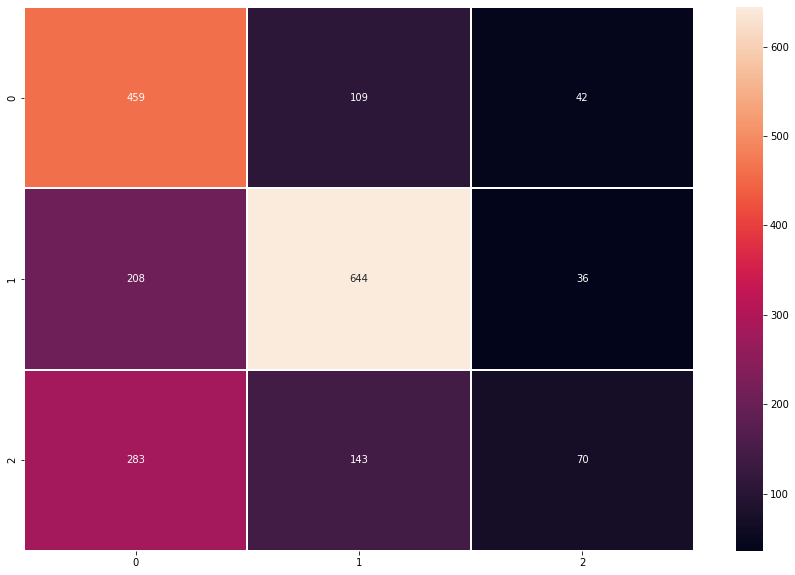

In [247]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#countvector
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

0.7249134948096886